# 세션 2

# 문제 1

- M 증권사에서는 고객 거래 내역 데이터를 이용해 VIP 고객 명단을 추출하고 이를 text 파일로 저장하려 합니다.
- "customer_data" 딕셔너리는 고객의 이름을 키(key)값으로 하고 해당 고객이 지금까지 지출한 수수료를 벨류(value) 값으로 갖습니다.
- 현재 코드를 작성 중인 디렉토리 안에서 **"customer"이라는 하위 디렉토리가 없을 경우 "customer" 디렉토리를 새로 만들고**, 해당 디렉토리 안에 **지출 수수료가 10,000 이상인 고객들의 이름과 지출 수수료가 한줄씩 정리된 text 파일을 "vip_list.txt"라는 이름으로 생성해 주세요.**

In [1]:
import os

customer_data = {'A':10000, 'B':5000, 'C':200000, 'D':10000, 'E':500, 'F':300000, 'G':50000, 'H':7000}

try:
    os.chdir('customer')
except FileNotFoundError:
    os.mkdir('customer')
    with open('customer/vip_list.txt', 'w') as f:
        for customer in customer_data:
            customer_value = customer_data[customer]
            if customer_value >= 10000:
                f.write("%s %s\n" %(customer, customer_value))

In [3]:
with open('customer/vip_list.txt', 'r') as f:
    print(f.read())

A 10000
C 200000
D 10000
F 300000
G 50000



In [ ]:
# 정답

import os
customer_data = {'A':10000, 'B':5000, 'C':200000, 'D':10000, 'E':500, 'F':300000, 'G':50000, 'H':7000, 'J':9000}

if not os.path.isdir("customer"):
    os.mkdir('customer')

with open("customer/vip_list.txt", 'w', encoding='utf-8') as f:
    for key, value in customer_data.items():
        if value >= 10000:
            f.write(key + " " + str(value) +  '\n')

# 문제 2

- 자산군간 상관계수 행렬 구하기
- 지난 5년간의 주식, 미국장기채권, 금, 리츠, 비트코인의 일간 수익률들의 상관계수 행렬을 구하기

(1) pandas, pandas_datareader import하고 ETF 가격 데이터 불러오기
- 각 자산군의 가격정보는 뉴욕거래소에 상장된 각 자산군들의 ETF 가격을 이용
- 각 자산군들의 ETF 티커 : (주식, VT), (미국장기채권, TLT), (금, GLD), (리츠, VNQ), (비트코인, BTC-USD)

문제1. 각 자산군의 2016년 1월 1일부터 2020년 12월 31일까지의 수정종가(Adj Close) 정보를 각 ETF 티커명으로 변수명으로 해 할당하세요.

In [4]:
# 먼저 시계열 자료, 패널형 자료를 보다 편리한 형태로 처리하는 것을 도와주는 패키지인 pandas와 pandas의 datareader를 import합니다.
import pandas as pd
import pandas_datareader as reader

# pandas_datareader를 이용하면 야후파이낸스에서 ETF, 주식가격, index 등의 정보를 시계열 데이터로 받아올 수 있습니다. 다음은 그 예시입니다. VT ETF(전세계 주식시장 index)의 2020년 가격정보를 받아와 출력합니다. name에 티커, data_source에는 'yahoo', start와 end에는 각각 받아오고 싶은 날짜의 시작과 끝을 지정해 주면 됩니다.

vt = reader.DataReader(name = 'VT', data_source='yahoo', start='2016-01-01', end='2020-12-31')
tlt = reader.DataReader(name = 'TLT', data_source='yahoo', start='2016-01-01', end='2020-12-31')
gld = reader.DataReader(name = 'GLD', data_source='yahoo', start='2016-01-01', end='2020-12-31')
vnq = reader.DataReader(name = 'VNQ', data_source='yahoo', start='2016-01-01', end='2020-12-31')
btc = reader.DataReader(name = 'BTC-USD', data_source='yahoo', start='2016-01-01', end='2020-12-31')

#pandas의 컬럼 인덱싱: pandas의 자료형은 MS Excel의 모양을 생각해보면 쉽습니다. 바로위에서 받아온 정보를 출력해 보셨다면 각 행에는 날짜, 열에는 시초가, 종가, 고가, 저가, 수정종가가 담긴 데이터를 반환함을 보셨을 겁니다. 그렇다면 이중 수정종가만 출력해서 변수에 할당하는 예시입니다. 할당후 출력해본다면 어떤 역할을 하는지 알 수 있습니다.

vt = vt['Adj Close']
tlt = tlt['Adj Close']
gld = gld['Adj Close']
vnq = vnq['Adj Close']
btc = btc['Adj Close']
print(vt)

Date
2015-12-31    51.373180
2016-01-04    50.508350
2016-01-05    50.517269
2016-01-06    49.768333
2016-01-07    48.609268
                ...    
2020-12-24    91.589996
2020-12-28    92.010002
2020-12-29    92.190002
2020-12-30    92.510002
2020-12-31    92.580002
Name: Adj Close, Length: 1260, dtype: float64


(2) pandas의 pct_change() 이용해 가격 → 수익률 변환하기

문제 2. 모든 티커들에 대해 수정종가 데이터를 수익률 데이터로 바꿔보세요.

In [5]:
#pandas에는 여러 편리한 함수들이 많이 있습니다. 그 중 하나가 pct_change()일텐데요. 문제1을 푸시고 할당된 변수들에 pct_change() 메소드를 적용해 봅시다. 메소드 이름부터 무슨 기능인지 강하게 짐작케 합니다.

vt = vt.pct_change()
tlt = tlt.pct_change()
gld = gld.pct_change()
vnq = vnq.pct_change()
btc = btc.pct_change()

print(vt)

Date
2015-12-31         NaN
2016-01-04   -0.016834
2016-01-05    0.000177
2016-01-06   -0.014825
2016-01-07   -0.023289
                ...   
2020-12-24    0.002298
2020-12-28    0.004586
2020-12-29    0.001956
2020-12-30    0.003471
2020-12-31    0.000757
Name: Adj Close, Length: 1260, dtype: float64


(3) DataFrame 합치고 상관계수 행렬 반환하기

문제 3. 지금까지 만든 다양한 자산군 수익률들의 상관계수 행렬을 바로  반환해주는 pandas 메소드가 있습니다. 이를 통해 5개 자산군 간의 일간 수익률 상관계수 행렬을 출력하세요.

In [6]:
# btc만 index 길이가 다름
print(tlt, gld, vnq, btc)

Date
2015-12-31         NaN
2016-01-04    0.007215
2016-01-05   -0.004035
2016-01-06    0.013476
2016-01-07    0.001795
                ...   
2020-12-24    0.003957
2020-12-28    0.000445
2020-12-29   -0.001271
2020-12-30    0.002163
2020-12-31    0.001460
Name: Adj Close, Length: 1260, dtype: float64 Date
2015-12-31         NaN
2016-01-04    0.014094
2016-01-05    0.002819
2016-01-06    0.014441
2016-01-07    0.014140
                ...   
2020-12-24    0.003985
2020-12-28   -0.003629
2020-12-29    0.003642
2020-12-30    0.007655
2020-12-31    0.003714
Name: Adj Close, Length: 1260, dtype: float64 Date
2015-12-31         NaN
2016-01-04   -0.012041
2016-01-05    0.019297
2016-01-06   -0.002740
2016-01-07   -0.019483
                ...   
2020-12-24    0.008755
2020-12-28    0.005961
2020-12-29   -0.008533
2020-12-30    0.005498
2020-12-31    0.009629
Name: Adj Close, Length: 1260, dtype: float64 Date
2015-12-31         NaN
2016-01-01    0.008749
2016-01-02   -0.002063
2016-01-03   -

In [7]:
# pandas의 자료형(엑셀모양)을 합치는 방법에는 여러가지가 있습니다. 일단 방향이 중요한 경우가 많은데요. 이전까지의 티커별 할당이 전부 완료되었다면,

table = pd.concat([vt, tlt], axis = 1, join='inner')
table = pd.concat([table, gld], axis = 1, join='inner')
table = pd.concat([table, vnq], axis = 1, join='inner')
table = pd.concat([table, btc], axis = 1, join='inner')

# 위 과정을 통해 pandas의 concat 메소드에 대해 익히고, 이를 이용해 table 변수에 vt, tlt, gld, vnq, btc의 일간 수익률 정보를 모두 포함한 하나의 자료형을 만들어 보세요. 다음을 참조할 수 있습니다.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

# 만들었다면 다음 코드를 통해 컬럼명을 조절할 수 있습니다. 
table.columns = ['Stock', 'LT Bond','Gold', 'Reits', 'Bitcoin']
table

,Stock,LT Bond,Gold,Reits,Bitcoin
Date,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN
2016-01-04,-0.016834,0.007215,0.014094,-0.012041,0.007163
2016-01-05,0.000177,-0.004035,0.002819,0.019297,-0.002611
2016-01-06,-0.014825,0.013476,0.014441,-0.002740,-0.006609
2016-01-07,-0.023289,0.001795,0.014140,-0.019483,0.067450
...,...,...,...,...,...
2020-12-24,0.002298,0.003957,0.003985,0.008755,0.021281
2020-12-28,0.004586,0.000445,-0.003629,0.005961,0.030927
2020-12-29,0.001956,-0.001271,0.003642,-0.008533,0.010250


In [8]:
table.corr()

,Stock,LT Bond,Gold,Reits,Bitcoin
Stock,1.000000,-0.403046,0.011673,0.757723,0.116826
LT Bond,-0.403046,1.000000,0.343991,-0.197138,-0.008563
Gold,0.011673,0.343991,1.000000,0.076565,0.067897
Reits,0.757723,-0.197138,0.076565,1.000000,0.069764
Bitcoin,0.116826,-0.008563,0.067897,0.069764,1.000000


<AxesSubplot:>

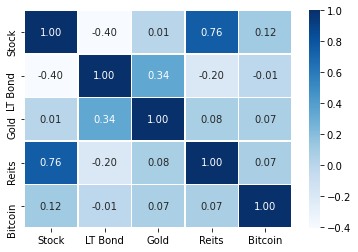

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data = table.corr(), 
            annot=True, 
            fmt = '.2f', 
            linewidths=.5, 
            cmap='Blues')

# 문제 3

<VWMA(Volume Weighted Moving Average) 구하기>

- 각 주식의 n일 VWMA를 구하는 함수를 정의하고 20일 VWMA 값을 출력해주시면 됩니다.

1. Universe는 KOSPI시장이고 기간은 2020년 1년 입니다
2. 위 문제에서의 **VWMA**란 거래량에 비례해서 주가의 가중치를 달리하여 이동평균을 계산한 가격을 의미합니다.
3. n일 VWMA는 다음과 같이 정의 됩니다.
    - $\sum^n_{i=1} \frac {V_i*P_i}{(\sum^n_{i=1}V_{i})}$
    - $\\ V_{i}는 \ i시점의 \ 거래량$
    - $\\ P_{i}는 \ i시점의 \ 종가입니다.$
4. **VWMA 함수에 대한 예외처리 조건은 다음과 같습니다.**
    - (raise 이용)
        - n일 가격과 거래량 데이터 중 0이 포함되어 있으면 ValueError를 raise
        - 거래량의 총합이 0인 경우 ZeroDivisionError를 raise
        - 이 외의 Error 또한 자유롭게 예외처리 하셔도 무방합니다.
    - (except 구문 이용)
        - ValueError의 경우 0 값으로 VWMA 값을 대체하는 예외처리를 구현
    - (else 구문 이용)
        - 이 외의 경우엔 모두 위 식을 이용해서 VWMA를 계산합니다.
    - (finally 구문 이용)
        - 종목의 어떤 날짜의 VWMA를 계산했는지 출력합니다.
        - 마지막으로 구한 값들을 return합니다.

### 필요 패키지 설치 및 util_function

- data는 key가 종목코드인 dictionary입니다.
- data의 value는 key가 ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change'] 인 dictionary입니다.
- data value dictionary 안에는 Date 일자에 해당되는
    - 주식의 시가, 고가, 저가,종가
    - 거래량, 전일대비수익률이 들어있습니다.

In [ ]:
# 실행 X

import sys
import subprocess
def pip_install(package,typ='windows'):
    # 패키지 설치를 위한 함수입니다.
    if typ =='windows':
        subprocess.check_call(["pip", "install", package])
    else:
        subprocess.check_call(["sudo", sys.executable, "-m", "pip", "install", package])

for need_pack in ['pandas','numpy','numpy_ext','finance-datareader']:
    pip_install(need_pack)

import FinanceDataReader as fdr # 상장 기업 정보 불러와서 저장하기

import pandas as pd # 데이터 프레임 처리
import numpy as np  # array 처리

import asyncio # util 함수 사용에 필요
from functools import partial   # util 함수 사용에 필요
from numpy_ext import rolling_apply  # numpy extension tools 이용

async def tofuture(func, item):
    # 문제 범위와 관련 X
    # 비동기 future 객체 생성
    global loop
    dat = await loop.run_in_executor(None, func, item)
    return dat


async def get_df(func, **kargs):
    # 문제 범위와 관련 X
    # 비동기 처리
    sub = {k: v for k, v in kargs.items() if k != 'iter'}
    new_funct = partial(func, **sub)
    futures = [tofuture(new_funct, i) for i in kargs['iter']]
    req = await asyncio.gather(*futures, return_exceptions=True)
    return req

def market_data_get(market_name,start,end):
    """
    시장 가격을 가져오는 함수 입니다. 자유롭게 수정하셔서 사용하셔도 됩니다!
    비동기로 실행하는 부분은 이해할 필요없이 그냥 넘어가셔도 됩니다.
    :param market_name: 시장 이름 help(fdr.StockListing) 실행 시 나오는 market 인자만 입력 가능합니다.
    :param start: 주가의 시작일
    :param end: 주가의 끝일
    :return: 종목코드와 Date가 Index인 주식 OHLCV 데이터
    """
    market_info = fdr.StockListing(market_name)
    market_info = market_info.dropna(subset=['Sector'])
    kw = {}
    kw['start'] = start
    kw['end'] = end
    kw['iter'] = market_info['Symbol'].to_list()
    loop = asyncio.get_event_loop()
    df = loop.run_until_complete(get_df(fdr.DataReader, **kw))
    for data, code in zip(df, kw['iter']):
        data['Symbol'] = code
    return pd.concat(df,axis=0).reset_index().set_index(['Symbol','Date'])

help(fdr.StockListing)

# market = ['S&P500', 'NASDAQ', 'NYSE', 'AMEX', 'SSE', 'SZSE', 'HKEX', 'TSE', 'HOSE','KRX', 'KOSPI', 'KOSDAQ', 'KONEX','KRX-DELISTING', 'KRX-MARCAP', 'KRX-ADMINISTRATIVE','ETF/KR']
data = market_data_get('KOSPI',start = '2020-01-02',end = '2020-12-31')

In [11]:
data = pd.read_csv("kospi_price.csv", encoding='utf-8') # 파일을 읽어오고
data['Symbol'] = data['Symbol'].apply(lambda x: str.zfill(str(x),6)) # Symbol이 int로 인식되기 떄문에 문자열로 다시 바꿔줌
data.set_index(['Symbol',"Date"],inplace=True)  # 종목코드와 Date가 Index인 주식 OHLCV 데이터로 만듬

- 종목코드와 Date가 Index인 DataFrame

In [ ]:
from numpy_ext import rolling_apply #iteration 편리하게 하기 위해 실행

def vwma(price,volume):
    # price와 volume은 종목코드와 Date가 Index인 Series
    # 이 함수를 완성해주시면 됩니다.
    # 이 방식 외의 다른 방식으로 문제 해결하셔도 무방합니다!
    try:
        #pass
    except ValueError:
        #pass
    else:
        #pass
    finally:
        #pass
data['VWMA'] = rolling_apply(vwma,20, data['Close'], data['Volume'])
# n일 만큼 indexing해서 함수 apply함

In [ ]:
# 정답

from numpy_ext import rolling_apply

def vwma(price, volume, verbose=True):
    # price와 volume은 종목코드와 Date가 Index인 Series
    try:
        if (0 in price.values) and (0 in volume.values):
            raise ValueError
    except ValueError:
        data = 0
    else:
        data = np.sum(price * volume) / np.sum(volume)
    finally:
        if verbose:
            print(price.index.get_level_values(0)[0],'종목', end=' ')
            print(price.index.get_level_values(1)[-1], '일 VWMA 계산완료')
        return data

data['VWMA'] = rolling_apply(vwma, 20, data['Close'], data['Volume'])

In [13]:
# print 정신 산만한 경우
VWMA_quiet = partial(vwma, verbose=False)
data['VWMA'] = rolling_apply(VWMA_quiet, 20, data['Close'], data['Volume'])

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


In [14]:
data

Open  High   Low  Close  Volume    Change  VWMA
Symbol Date                                                       
095570 2020-01-02  4900  5140  4895   5050  210107  0.016097   NaN
       2020-01-03  5050  5150  5030   5100  128274  0.009901   NaN
       2020-01-06  5080  5080  4950   5030  162087 -0.013725   NaN
       2020-01-07  5030  5100  4965   5030   42008  0.000000   NaN
       2020-01-08  5050  5060  4735   4935  110827 -0.018887   NaN
...                 ...   ...   ...    ...     ...       ...   ...
003280 2020-12-23     0     0     0    258       0  0.000000   NaN
       2020-12-24     0     0     0    258       0  0.000000   NaN
       2020-12-28     0     0     0    258       0  0.000000   NaN
       2020-12-29     0     0     0    258       0  0.000000   NaN
       2020-12-30     0     0     0    258       0  0.000000   NaN

[196141 rows x 7 columns]

In [25]:
len(data['VWMA'].unique())

194550